In [1]:
%matplotlib inline

import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.optimize import minimize

# load feature variables
X = np.loadtxt('moons.x.csv', delimiter = ',', skiprows = 1)
print(X)
print(np.shape(X)[0])
print(np.max(X))
print(np.min(X))
        
# load labels
y = np.loadtxt('moons.y.csv',delimiter = ',', skiprows = 1)

# split data into training set and test set (80-20 split)
X_tr = X[:799,:]
y_tr = y[:799]
X_test = X[799:,:]
y_test = y[799:]

[[ 0.2182 -0.1082]
 [ 1.1417 -0.5179]
 [ 0.3402 -0.0356]
 ...
 [ 0.965  -0.0342]
 [ 0.7432 -0.6251]
 [-1.1497  0.2339]]
999
2.6537
-1.5041


In [2]:
def decision_stump_weak_learner(s,params):
    
    j, p, X_train, y_train = params;
    #if round(sum(p))!=1 or any(p)<0:
    #    return "error"
    
    fi_x = np.zeros(np.shape(X_train)[0])
    
    for k in range(j):
        for i in range(np.shape(X_train)[0]):
            if X_train[i,k]<s:
                fi_x[i] = -1
            else:
                fi_x[i] = 1
        
    return sum(p*1/2*abs(fi_x-y_train))

In [3]:
# stub p with a uniform distribution to test function
p=np.zeros(np.shape(X_tr)[0])
for i in range(799):
    p[i]=1/799

# minimizing over the function with s and j as parameters and providing an assumption of the minimizers
prms1 = [1, p, X_tr, y_tr]
prms2 = [2, p, X_tr, y_tr]
min_rslt_1 = minimize(decision_stump_weak_learner, np.mean(X_tr),args=prms1,method='Nelder-Mead')
min_rslt_2 = minimize(decision_stump_weak_learner, np.mean(X_tr),args=prms2,method='Nelder-Mead')

In [4]:
print("For j=1:",min_rslt_1.fun)
print("Optimal s:",min_rslt_1.x)
print("Validation:",decision_stump_weak_learner(min_rslt_1.x,prms1))

For j=1: 0.28785982478097544
Optimal s: [0.25669594]
Validation: 0.28785982478097544


In [5]:
print("For j=2:", min_rslt_2.fun)
print("Optimal s:", min_rslt_2.x)

For j=2: 0.8022528160200344
Optimal s: [0.3943783]


In [6]:
print("0.8 > 0.29")
print("Optimal j: 1")

0.8 > 0.29
Optimal j: 1


In [10]:
def weak_learner(j,p,X_train,y_train):
    rslts = np.zeros(j)
    for k in range(j):
        prms = [k, p, X_train, y_train]
        min_rslt = minimize(decision_stump_weak_learner, np.mean(X_train),args=prms, method='Nelder-Mead')
        rslts[k] = min_rslt.fun
    
    minimizer_j = np.argmin(rslts)
    minimizer_s = min_rslt.x
    
    # computing return values fi_x for optimal decision stump
    fi_x = np.zeros(np.shape(X_train)[0])
 
    for i in range(np.shape(X_train)[0]):
        if X_train[i,minimizer_j]<minimizer_s:
            fi_x[i] = -1
        else:
            fi_x[i] = 1

    return minimizer_j, minimizer_s, fi_x

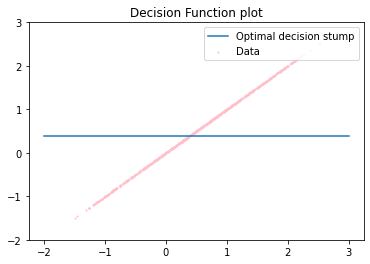

In [11]:
# Plotting the decision region of the optimal decision stump for the moons dataset when p uniform distribution
fi_x = np.zeros(np.shape(X_tr)[0])
for i in range(np.shape(X_tr)[0]):
            if X_tr[i,0]<min_rslt_1.x:
                fi_x[i] = -1
            else:
                fi_x[i] = 1
                
x = np.linspace(-2,3)
y1 = min_rslt_2.x*np.ones(np.shape(x))             
plt.plot(x,y1, label='Optimal decision stump')
plt.scatter(X_tr[:,0],X_tr[:,0], c='pink', s=1, label='Data')
plt.ylim(-2,3)
plt.title("Decision Function plot")
plt.legend(loc='upper right')
plt.show()

(-2.0, 3.0)

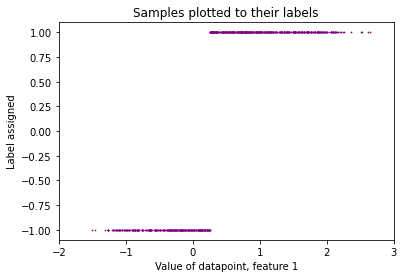

In [12]:
# Scatterplot of samples and labels
plt.scatter(X_tr[:,0],fi_x, c='purple', s=0.5)
plt.ylabel('Label assigned')
plt.xlabel('Value of datapoint, feature 1')
plt.title('Samples plotted to their labels')
plt.xlim(-2,3)